In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
dataset = pd.read_csv('acoes_ex.csv')
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,8.518181,37.820000,9.000000,11.325000,47.259998
1,2015-01-05,15.730000,8.745454,37.070000,8.270000,11.090000,46.320000
2,2015-01-06,16.330000,8.681818,36.150002,8.060000,11.245000,46.580002
3,2015-01-07,16.559999,8.809090,37.389999,8.450000,11.740000,48.150002
4,2015-01-08,16.540001,8.781818,38.910000,9.020000,11.780000,48.509998
...,...,...,...,...,...,...,...
2314,2024-04-24,12.040000,11.050000,47.900002,43.270000,27.500000,120.970001
2315,2024-04-25,12.020000,11.540000,47.689999,44.250000,27.379999,120.910004
2316,2024-04-26,12.010000,11.690000,48.000000,43.750000,27.379999,122.830002
2317,2024-04-29,12.100000,11.960000,47.930000,44.540001,27.549999,123.769997


CALCULOS DOS RETORNOS ANUAIS

In [3]:
dataset.describe()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
count,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000,2292.000000
mean,16.905653,11.794318,42.386300,23.861574,17.425248,86.480615
std,2.648044,1.901666,5.461489,9.184323,5.375518,25.215621
min,11.030000,8.130000,28.980000,5.910000,6.350000,36.450001
25%,14.710000,10.338181,38.250000,15.705000,14.210000,62.567500
50%,17.200001,11.690909,42.130001,24.520000,16.695000,93.079998
75%,18.870001,13.040908,45.705000,30.549999,21.525001,107.982502
max,24.270000,16.754545,56.740002,44.540001,29.799999,130.389999


CÁLCULOS COM TODAS AS ACÕES - RISCO MÉDIO ANUAL

In [4]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,16.020000,8.518181,37.820000,9.000000,11.325000,47.259998
1,15.730000,8.745454,37.070000,8.270000,11.090000,46.320000
2,16.330000,8.681818,36.150002,8.060000,11.245000,46.580002
3,16.559999,8.809090,37.389999,8.450000,11.740000,48.150002
4,16.540001,8.781818,38.910000,9.020000,11.780000,48.509998
...,...,...,...,...,...,...
2314,12.040000,11.050000,47.900002,43.270000,27.500000,120.970001
2315,12.020000,11.540000,47.689999,44.250000,27.379999,120.910004
2316,12.010000,11.690000,48.000000,43.750000,27.379999,122.830002
2317,12.100000,11.960000,47.930000,44.540001,27.549999,123.769997


In [5]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477
...,...,...,...,...,...,...
2314,0.015177,0.010979,-0.007048,-0.004372,-0.003623,-0.003624
2315,-0.001661,0.044344,-0.004384,0.022648,-0.004364,-0.000496
2316,-0.000832,0.012998,0.006500,-0.011299,0.000000,0.015880
2317,0.007494,0.023097,-0.001458,0.018057,0.006209,0.007653


In [6]:
taxas_retorno.std() * 100

# MENOR DESVIO INDICA MENOR RISCO

AMBEV         1.687744
ODONTOPREV    2.022461
VIVO          1.809923
PETROBRAS     3.095668
BBRASIL       2.622938
BOVA          1.573823
dtype: float64

In [7]:
# ABAIXO ESTÁ O RISCO MEDIO ANUAL
taxas_retorno.std() * math.sqrt(246) # ANUALIZAR

AMBEV         0.264712
ODONTOPREV    0.317211
VIVO          0.283875
PETROBRAS     0.485537
BBRASIL       0.411392
BOVA          0.246845
dtype: float64

CORRELAÇÃO, COVARIÂNCIA

In [8]:
# Indica se variam juntos, um grau de similaridade
taxas_retorno.cov()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
AMBEV,0.000285,0.000065,0.000095,0.000173,0.000175,0.000149
ODONTOPREV,0.000065,0.000409,0.000077,0.000128,0.000136,0.000112
VIVO,0.000095,0.000077,0.000328,0.000168,0.000164,0.000124
PETROBRAS,0.000173,0.000128,0.000168,0.000958,0.000480,0.000354
BBRASIL,0.000175,0.000136,0.000164,0.000480,0.000688,0.000320
BOVA,0.000149,0.000112,0.000124,0.000354,0.000320,0.000248


In [9]:
# Indica a correlação entre as variaveis
# Indice de correlaçao varia entre -1 e 1
taxas_retorno.corr()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
AMBEV,1.000000,0.189528,0.311110,0.331778,0.394682,0.558476
ODONTOPREV,0.189528,1.000000,0.209613,0.204100,0.255449,0.348905
VIVO,0.311110,0.209613,1.000000,0.299532,0.345075,0.432388
PETROBRAS,0.331778,0.204100,0.299532,1.000000,0.591742,0.722359
BBRASIL,0.394682,0.255449,0.345075,0.591742,1.000000,0.773119
BOVA,0.558476,0.348905,0.432388,0.722359,0.773119,1.000000


<Axes: >

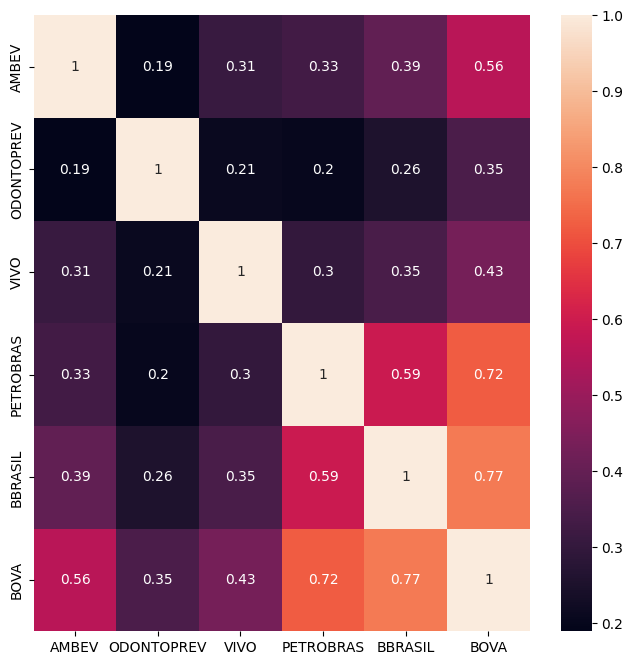

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True)


CALCULANDO A VOLATILIDADE DE TODA A CARTEIRA

In [11]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [12]:
taxas_retorno.cov() * 246

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
AMBEV,0.070073,0.015915,0.023378,0.042643,0.042981,0.036539
ODONTOPREV,0.015915,0.100623,0.018875,0.031435,0.033336,0.027460
VIVO,0.023378,0.018875,0.080585,0.041285,0.040299,0.030443
PETROBRAS,0.042643,0.031435,0.041285,0.235746,0.118198,0.086987
BBRASIL,0.042981,0.033336,0.040299,0.118198,0.169243,0.078794
BOVA,0.036539,0.027460,0.030443,0.086987,0.078794,0.060932


In [13]:
np.dot(taxas_retorno.cov() * 246, pesos1)

array([0.03899787, 0.04003658, 0.04088465, 0.09386123, 0.08081138,
       0.05204471])

In [14]:
import numpy as np

# Calcule a matriz de covariância das taxas de retorno
covariance_matrix = taxas_retorno.cov()

# Calcule a variância do portfólio usando a fórmula de portfólio
variancia_portfolio1 = np.dot(np.dot(pesos1, covariance_matrix * 246), pesos1)
variancia_portfolio1

0.058918339855530646

In [15]:
volatiidade_portfolio1 = math.sqrt(variancia_portfolio1)
volatiidade_portfolio1
# Pode multiplicar por 100 para achar em pocentagem já que no cálculo do RS não foi multiplicado por 100. O que não pode é multiplicar duas vezes

0.2427310030785739

In [16]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1])

In [17]:
covariance_matrix = taxas_retorno.cov()

# Calcule a variância do portfólio usando a fórmula de portfólio
variancia_portfolio2 = np.dot(np.dot(pesos2, covariance_matrix * 246), pesos2)
variancia_portfolio2

0.060932230671096495

In [18]:
# BOVA TEVE VOLATILIDADE UM POUCO MAIOR ATÉ 01/05/2024
volatiidade_portfolio2 = math.sqrt(variancia_portfolio2)
volatiidade_portfolio2

0.2468445475822719

RISCO SISTEMÁTICO E NÃO SISTEMÁTICO

In [19]:
# RISCO SISTEMÁTICO DEPENDE DE EVENTOS EXTERNOS À EMPRESA
# N SIST. É ESPECÍFICO DA EMPRESA

In [20]:
taxas_retorno.var() # Variancia é como os dados variam em relação à média

AMBEV         0.000285
ODONTOPREV    0.000409
VIVO          0.000328
PETROBRAS     0.000958
BBRASIL       0.000688
BOVA          0.000248
dtype: float64

In [21]:
taxas_retorno.var() * 246

AMBEV         0.070073
ODONTOPREV    0.100623
VIVO          0.080585
PETROBRAS     0.235746
BBRASIL       0.169243
BOVA          0.060932
dtype: float64

In [22]:
variancia_pesos1 = (taxas_retorno.var() * 246) * pesos1
variancia_pesos1

AMBEV         0.014015
ODONTOPREV    0.020125
VIVO          0.016117
PETROBRAS     0.047149
BBRASIL       0.033849
BOVA          0.000000
dtype: float64

In [23]:
sub1 = variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5]
sub1

C:\Users\tdw07\AppData\Local\Temp\ipykernel_5844\1463896755.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sub1 = variancia_pesos1[0] - variancia_pesos1[1] - variancia_pesos1[2] - variancia_pesos1[3] - variancia_pesos1[4] - variancia_pesos1[5]


-0.10322480359805089

In [24]:
risco_nao_sistematico1 = (variancia_portfolio1 - sub1)
risco_nao_sistematico1

0.16214314345358155

In [25]:
variancia_pesos2 = (taxas_retorno.var() * 246) * pesos2
variancia_pesos2

AMBEV         0.000000
ODONTOPREV    0.000000
VIVO          0.000000
PETROBRAS     0.000000
BBRASIL       0.000000
BOVA          0.060932
dtype: float64

In [26]:
sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]
sub2

C:\Users\tdw07\AppData\Local\Temp\ipykernel_5844\4294234593.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sub2 = variancia_pesos2[0] - variancia_pesos2[1] - variancia_pesos2[2] - variancia_pesos2[3] - variancia_pesos2[4] - variancia_pesos2[5]


-0.060932230671096654

In [27]:
risco_nao_sistematico2 = (variancia_portfolio2 - sub2)
risco_nao_sistematico2

# Risco na BOVA foi menor até o dia 01/05/2024

0.12186446134219314